In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
pd.set_option('display.max_columns', None)

In [28]:
import yfinance as yf
import bs4 as bs
import pickle
import requests
import pandas as pd
import os
import sys
from pandas_datareader import data as pdr


In [79]:
filepath = '../data/SP500Data/'
threshold = 0.4;
def buildCorrGraph(filepath,threshhold):
    dirs = os.listdir(filepath)
    combined_df = pd.DataFrame()
    for x in dirs:
        if '.csv' in x:
            df = pd.read_csv(filepath + x, error_bad_lines=False);
            #remove the csv to get the ticker tag
            combined_df[x.replace('.csv','')] = abs(df['Close'].diff())

    combined_df = combined_df.iloc[2:]
    corr_df = combined_df.corr()
    corr4 = corr_df.applymap(lambda x: 0 if x < threshhold else 1)
    display(corr4)
    if 'DowJones' in filepath:
            corr4.to_csv('../data/dowJonescorrelation0.4graph.csv')
    else:
        corr4.to_csv('../data/sp500correlation0.4graph.csv')

In [78]:
buildCorrGraph(filepath,threshold)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BF.B,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BRK.B,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTLT,CTSH,CTVA,CTXS,CVS,CVX,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DOW,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,ENPH,EOG,EQIX,EQR,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FOX,FOXA,FRC,FRT,FTNT,FTV,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INFO,INTC,INTU,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUMN,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MNST,MO,MOS,MPC,MPWR,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,NCLH,NDAQ,NEE,NEM,NFLX,NI,NKE,NLOK,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,O,ODFL,OKE,OMC,ORCL,ORLY,OTIS,OXY,PAYC,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,PYPL,QCOM,QRVO,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TWTR,TXN,TXT,TYL,UA,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VIAC,VLO,VMC,VNO,VNT,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AAL,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Text(0, 0.5, 'Normalized Price')

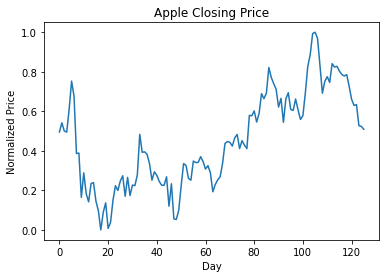

In [21]:
pd.read_csv('../data/dowJonesData/AAPL.csv')['Close'].plot()
plt.title('Apple Closing Price')
plt.xlabel('Day')
plt.ylabel('Normalized Price')

In [33]:
sp500tic = save_sp500_tickers()
print(sp500tic)

data = pdr.get_data_yahoo(sp500tic,period = "6mo", group_by='ticker')

#loops for each ticker and create a dataaframe out of it
for tickers in sp500tic:
    df= pd.DataFrame(data[tickers])
    df = (df-df.min())/(df.max()-df.min())
    df.to_excel('../data/SP500Data/' +tickers +'.xlsx')

tickerdf = pd.DataFrame(sp500tic,columns=['ticker'])



['ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN

KeyboardInterrupt: 

In [21]:


#loops for each ticker and create a dataaframe out of it
sp50_df = pd.DataFrame()
for tickers in sp500tic:
    if tickers in data:
        sp50_df[tickers] = abs(data[tickers]['Close'].diff())


tickerdf = sp50_df.iloc[2:]
spcorr = tickerdf.corr()


Text(0, 0.5, 'Average Node Degree')

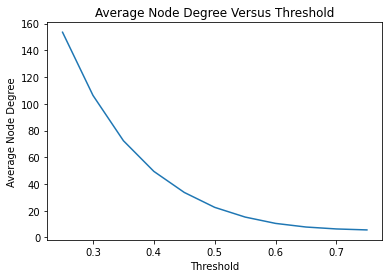

In [22]:
vals = []
xaxis = [x / 100.0 for x in range(25, 80, 5)]
for y in xaxis:    
    temp_df = spcorr.applymap(lambda x: 0 if x < y else 1)

    vals.append(np.mean(temp_df.sum(axis = 1)))
plt.plot(xaxis,vals)
plt.title('Average Node Degree Versus Threshold')
plt.xlabel('Threshold')
plt.ylabel('Average Node Degree')

In [23]:
corr4 = spcorr.applymap(lambda x: 0 if x < 0.4 else 1)
corr4.to_csv('../data/sp500correlation0.4graph.csv')

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,BKR,BLL,BAC,BK,BAX,BDX,BRK.B,BBY,BIO,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BF.B,CHRW,COG,CDNS,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CERN,CF,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,COST,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISCA,DISCK,DISH,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DRE,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ENPH,ETR,EOG,EFX,EQIX,EQR,ESS,EL,ETSY,EVRG,ES,RE,EXC,EXPE,EXPD,EXR,XOM,FFIV,FB,FAST,FRT,FDX,FIS,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GPS,GRMN,IT,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,GWW,HAL,HBI,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HFC,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IEX,IDXX,INFO,ITW,ILMN,INCY,IR,INTC,ICE,IBM,IP,IPG,IFF,INTU,ISRG,IVZ,IPGP,IQV,IRM,JKHY,J,JBHT,SJM,JNJ,JCI,JPM,JNPR,KSU,K,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LB,LHX,LH,LRCX,LW,LVS,LEG,LDOS,LEN,LLY,LNC,LIN,LYV,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MKC,MXIM,MCD,MCK,MDT,MRK,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MHK,TAP,MDLZ,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NLSN,NKE,NI,NSC,NTRS,NOC,NLOK,NCLH,NOV,NRG,NUE,NVDA,NVR,ORLY,OXY,ODFL,OMC,OKE,ORCL,OTIS,PCAR,PKG,PH,PAYX,PAYC,PYPL,PNR,PBCT,PEP,PKI,PRGO,PFE,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SLG,SNA,SO,LUV,SWK,SBUX,STT,STE,SYK,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TGT,TEL,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TWTR,TYL,TSN,UDR,ULTA,USB,UAA,UA,UNP,UAL,UNH,UPS,URI,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNT,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
ABT,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
ABBV,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<AxesSubplot:>

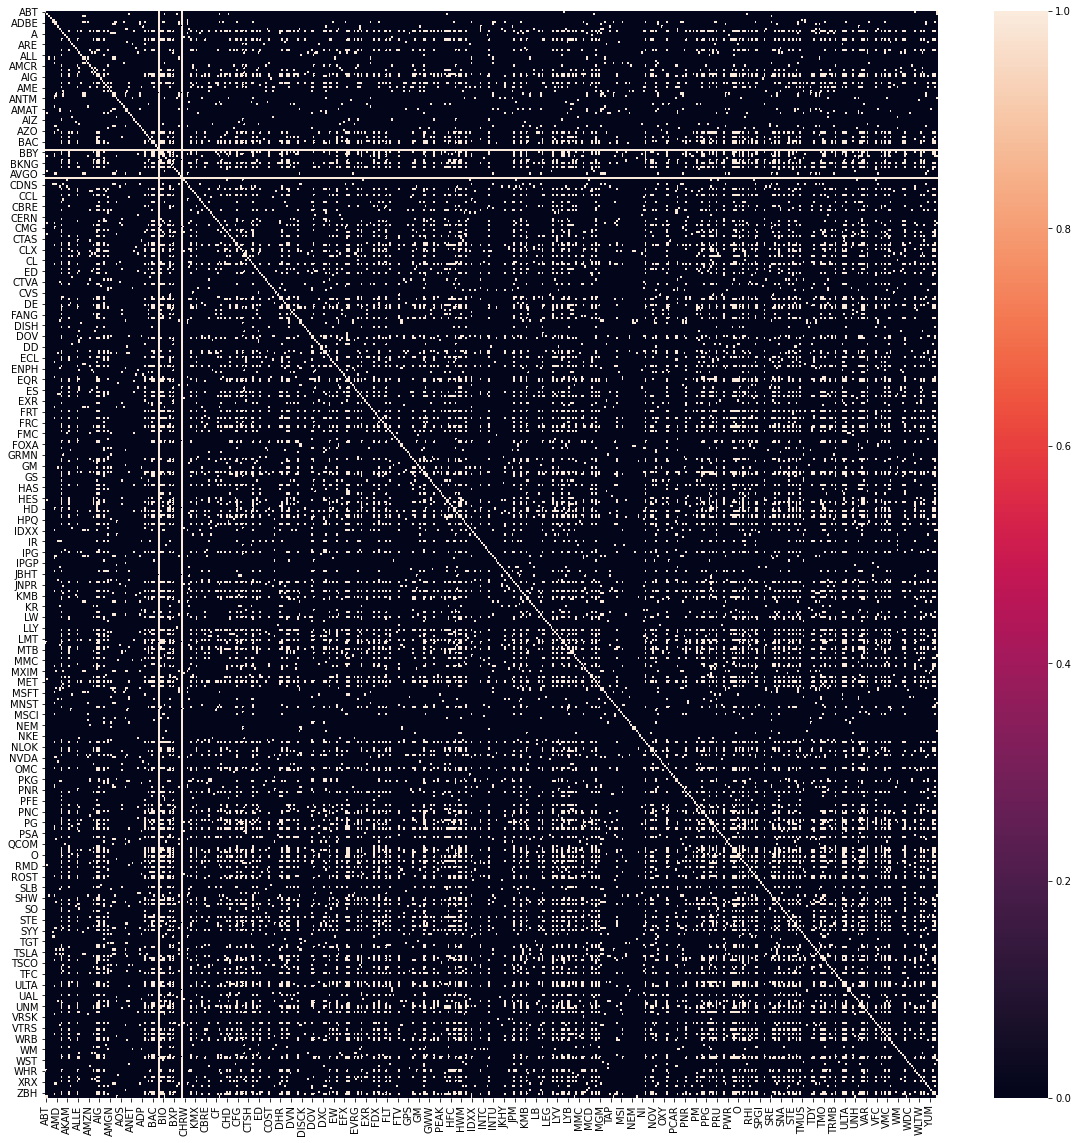

In [25]:
fig, ax = plt.subplots(figsize=(20,20)) 
seaborn.heatmap(corr4,ax=ax)

In [18]:
yf.pdr_override()
dow = save_dow_tickers()
print(dow)
    
data = pdr.get_data_yahoo(dow,period = "6mo", group_by='ticker')

combined_df = pd.DataFrame()
for tickers in dow:
    combined_df[tickers] = abs(data[tickers]['Close'].diff())


combined_df = combined_df.iloc[2:]
corr_df = combined_df.corr()
corr_df

FileNotFoundError: [Errno 2] No such file or directory: './data/correlation0.4graph.csv'

Text(0, 0.5, 'Average Node Degree')

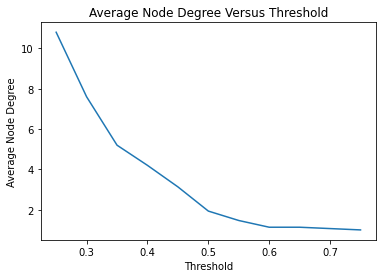

In [5]:
vals = []
xaxis = [x / 100.0 for x in range(25, 80, 5)]
for y in xaxis:    
    temp_df = corr_df.applymap(lambda x: 0 if x < y else 1)

    vals.append(np.mean(temp_df.sum(axis = 1)))
plt.plot(xaxis,vals)
plt.title('Average Node Degree Versus Threshold')
plt.xlabel('Threshold')
plt.ylabel('Average Node Degree')

In [6]:
#decide to use 0.4 because the connectnedess is not too far apart
corr4 = corr_df.applymap(lambda x: 0 if x < 0.4 else 1)
corr4.to_csv('../data/correlation0.4graph.csv')
display(corr4)


,AAPL,NKE,INTC,V,WBA,DIS,UNH,AMGN,HON,HD,AXP,CSCO,MSFT,WMT,MCD,TRV,BA,MMM,VZ,CVX,KO,PG,GS,JNJ,JPM,CAT,MRK,IBM,DOW,CRM
AAPL,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NKE,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
INTC,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
V,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
WBA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DIS,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
UNH,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
AMGN,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HON,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0
HD,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


<AxesSubplot:>

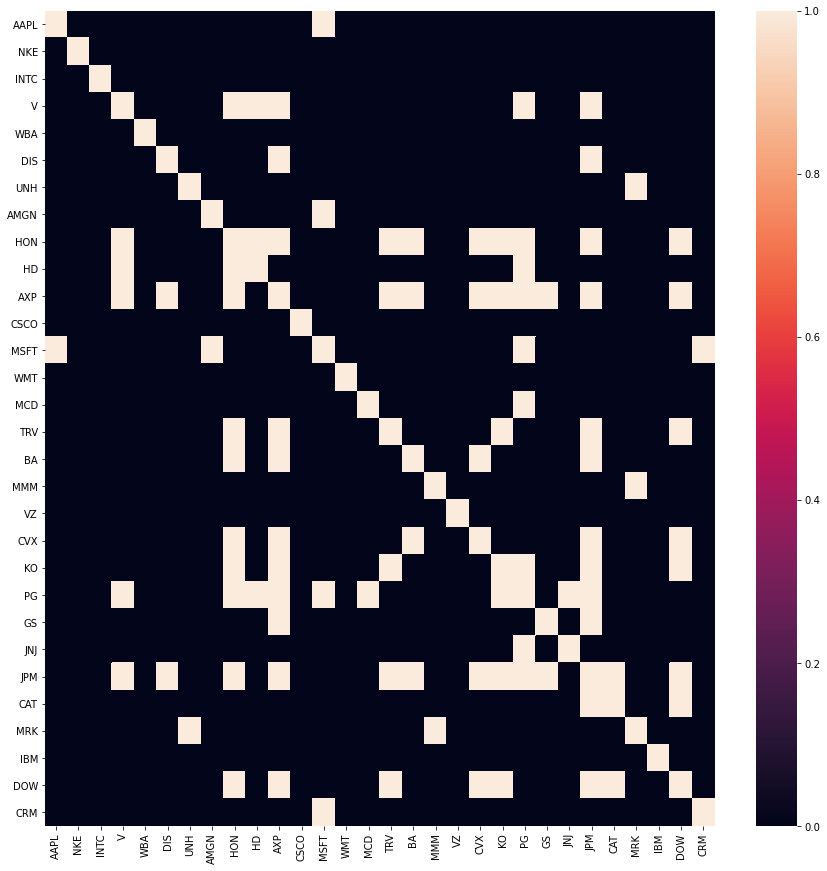

In [13]:
fig, ax = plt.subplots(figsize=(15,15)) 
seaborn.heatmap(corr4,ax=ax)
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)


In [6]:
# yf.pdr_override()
# dow = save_dow_tickers()
# print(dow)
    
# data = pdr.get_data_yahoo(dow,period = "6mo", group_by='ticker')
# for x in dow:
#     df = data[x]
#     df = (df-df.min())/(df.max()-df.min())

# df.to_excel('hi.xlsx')


<Response [200]>
['VZ', 'JNJ', 'AXP', 'MSFT', 'MRK', 'CSCO', 'CRM', 'JPM', 'WBA', 'INTC', 'UNH', 'TRV', 'IBM', 'HD', 'NKE', 'HON', 'PG', 'AAPL', 'V', 'GS', 'MCD', 'CVX', 'CAT', 'KO', 'AMGN', 'MMM', 'DOW', 'DIS', 'BA', 'WMT']
[*********************100%***********************]  30 of 30 completed


In [17]:
combined_df.corr()

,HD,MSFT,GS,JPM,V,CVX,MRK,AAPL,VZ,AMGN,...,AXP,HON,WMT,BA,KO,UNH,JNJ,DOW,CSCO,NKE
HD,1.000000,0.014153,0.085617,0.047178,0.070807,-0.123024,-0.164614,0.029235,-0.131559,-0.034996,...,-0.030576,0.091346,-0.081100,0.123024,0.022780,-0.034996,-0.065372,0.110577,-0.166478,0.093011
MSFT,0.014153,1.000000,0.037341,-0.166667,0.127912,-0.027507,-0.140694,-0.009563,-0.107583,0.117073,...,-0.170549,-0.051896,-0.041323,0.155871,-0.033531,0.182634,-0.160375,-0.245327,-0.210042,-0.055692
GS,0.085617,0.037341,1.000000,0.037341,-0.000796,0.054694,0.013134,-0.007231,-0.043386,-0.007869,...,0.132941,-0.014270,-0.028546,0.139432,-0.052962,0.157378,-0.048507,-0.085617,0.058824,0.017936
JPM,0.047178,-0.166667,0.037341,1.000000,0.094749,0.068767,0.187592,0.057378,-0.032275,0.051512,...,0.326886,0.047178,-0.009183,-0.068767,0.013412,-0.014049,0.032075,0.117946,0.070014,-0.088179
V,0.070807,0.127912,-0.000796,0.094749,1.000000,0.123276,-0.025773,0.110089,-0.135776,0.045258,...,0.015890,0.003218,0.065516,-0.123276,0.016393,0.078802,0.049233,-0.070807,-0.027862,0.074139
CVX,-0.123024,-0.027507,0.054694,0.068767,0.123276,1.000000,0.181461,-0.007102,0.081675,0.136541,...,0.123276,0.007786,0.113413,-0.173770,0.128756,-0.058223,0.174691,0.188429,0.042369,-0.107488
MRK,-0.164614,-0.140694,0.013134,0.187592,-0.025773,0.181461,1.000000,-0.008073,0.121090,-0.144070,...,0.123531,0.058412,0.124890,0.035260,0.081771,-0.180967,0.270765,0.015930,0.170743,-0.040919
AAPL,0.029235,-0.009563,-0.007231,0.057378,0.110089,-0.007102,-0.008073,1.000000,-0.066667,0.004837,...,0.075839,0.097451,-0.135147,-0.125472,0.003463,-0.096730,-0.016563,0.107196,-0.108465,-0.064708
VZ,-0.131559,-0.107583,-0.043386,-0.032275,-0.135776,0.081675,0.121090,-0.066667,1.000000,-0.123331,...,0.095410,-0.054816,0.135147,-0.081675,0.348034,-0.047156,0.223607,0.285044,0.108465,0.039544
AMGN,-0.034996,0.117073,-0.007869,0.051512,0.045258,0.136541,-0.144070,0.004837,-0.123331,1.000000,...,-0.122463,-0.001591,-0.110946,-0.104080,-0.012059,-0.094211,-0.032444,-0.031814,-0.157378,0.064679


In [11]:
sp500tic = save_sp500_tickers()
print(sp500tic)

data = pdr.get_data_yahoo(sp500tic,period = "6mo", group_by='ticker')

sp500corr_df = pd.DataFrame()
for tickers in sp500tic:
    sp500corr_df[tickers] = abs(data[tickers]['Close'].diff())

sp500corr_df = sp500corr_df[1:]
sp500corr_df

  Symbol             Security SEC filings             GICS Sector  \
0    MMM           3M Company     reports             Industrials   
1    ABT  Abbott Laboratories     reports             Health Care   
2   ABBV          AbbVie Inc.     reports             Health Care   
3   ABMD              Abiomed     reports             Health Care   
4    ACN            Accenture     reports  Information Technology   

                GICS Sub-Industry    Headquarters Location Date first added  \
0        Industrial Conglomerates      St. Paul, Minnesota       1976-08-09   
1           Health Care Equipment  North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals  North Chicago, Illinois       2012-12-31   
3           Health Care Equipment   Danvers, Massachusetts       2018-05-31   
4  IT Consulting & Other Services          Dublin, Ireland       2011-07-06   

       CIK      Founded  
0    66740         1902  
1     1800         1888  
2  1551152  2013 (1888)  
3   81

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,ANSS,ANTM,AON,AOS,APA,AAPL,AMAT,APTV,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,BKR,BLL,BAC,BK,BAX,BDX,BRK.B,BBY,BIO,BIIB,BLK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BF.B,CHRW,COG,CDNS,CPB,COF,CAH,KMX,CCL,CARR,CTLT,CAT,CBOE,CBRE,CDW,CE,CNC,CNP,CERN,CF,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,COO,CPRT,GLW,CTVA,COST,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DXCM,FANG,DLR,DFS,DISCA,DISCK,DISH,DG,DLTR,D,DPZ,DOV,DOW,DTE,DUK,DRE,DD,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ENPH,ETR,EOG,EFX,EQIX,EQR,ESS,EL,ETSY,EVRG,ES,RE,EXC,EXPE,EXPD,EXR,XOM,FFIV,FB,FAST,FRT,FDX,FIS,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,FTNT,FTV,FBHS,FOXA,FOX,BEN,FCX,GPS,GRMN,IT,GD,GE,GIS,GM,GPC,GILD,GL,GPN,GS,GWW,HAL,HBI,HIG,HAS,HCA,PEAK,HSIC,HSY,HES,HPE,HLT,HFC,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUM,HBAN,HII,IEX,IDXX,INFO,ITW,ILMN,INCY,IR,INTC,ICE,IBM,IP,IPG,IFF,INTU,ISRG,IVZ,IPGP,IQV,IRM,JKHY,J,JBHT,SJM,JNJ,JCI,JPM,JNPR,KSU,K,KEY,KEYS,KMB,KIM,KMI,KLAC,KHC,KR,LB,LHX,LH,LRCX,LW,LVS,LEG,LDOS,LEN,LLY,LNC,LIN,LYV,LKQ,LMT,L,LOW,LUMN,LYB,MTB,MRO,MPC,MKTX,MAR,MMC,MLM,MAS,MA,MKC,MXIM,MCD,MCK,MDT,MRK,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MHK,TAP,MDLZ,MNST,MCO,MS,MOS,MSI,MSCI,NDAQ,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NLSN,NKE,NI,NSC,NTRS,NOC,NLOK,NCLH,NOV,NRG,NUE,NVDA,NVR,ORLY,OXY,ODFL,OMC,OKE,ORCL,OTIS,PCAR,PKG,PH,PAYX,PAYC,PYPL,PNR,PBCT,PEP,PKI,PRGO,PFE,PM,PSX,PNW,PXD,PNC,POOL,PPG,PPL,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QRVO,PWR,QCOM,DGX,RL,RJF,RTX,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROL,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,NOW,SHW,SPG,SWKS,SLG,SNA,SO,LUV,SWK,SBUX,STT,STE,SYK,SIVB,SYF,SNPS,SYY,TMUS,TROW,TTWO,TPR,TGT,TEL,FTI,TDY,TFX,TER,TSLA,TXN,TXT,TMO,TJX,TSCO,TT,TDG,TRV,TRMB,TFC,TWTR,TYL,TSN,UDR,ULTA,USB,UAA,UA,UNP,UAL,UNH,UPS,URI,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,VIAC,VTRS,V,VNT,VNO,VMC,WRB,WAB,WMT,WBA,DIS,WM,WAT,WEC,WFC,WELL,WST,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [19]:
sp500corr_df = sp500corr_df.applymap(lambda x: 0 if np.log(x) < 0.5 else 1)
sp500corr_df

<ipython-input-19-9bc6ce68c6b4>:1: RuntimeWarning: divide by zero encountered in log
  sp500corr_df = sp500corr_df.applymap(lambda x: 0 if np.log(x) < 0.5 else 1)


,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,0,0,1,0,1,1,1,0,0,0,...,1,1,0,0,0,0,1,1,0,1
2020-08-10,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2020-08-11,0,0,1,1,1,1,1,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2020-08-12,0,1,1,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2020-08-13,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0,0,1,1,0,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2021-02-02,1,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,0,1
2021-02-03,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


<AxesSubplot:>

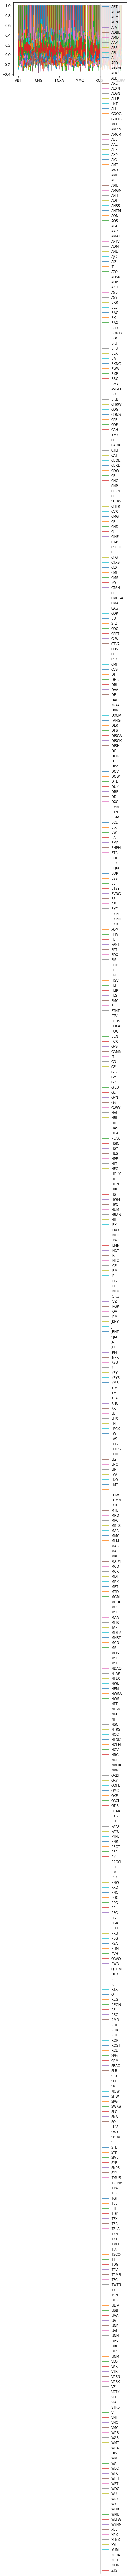

In [21]:
sp500corr_df.corr().plot()

In [81]:
tickers = 'WMT WBA VZ V UNH TRV PG NKE MSFT MRK MMM MCD KO JPM JNJ INTC IBM HON HD GS DOW DIS CVX CSCO CRM CAT BA AXP AMGN AAPL'
len(tickers.split(" "))

30